## Assignment 1: CIFAR-10

### Name:- Nishank Gujar
### UTA ID:- 1001861756

<b><u>References</u></b>
<b><div class="alert-success"> Green :- My Contribution </div>
<div class="alert-danger"> Red :- PYTORCH "https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py"" </div>
<div class="alert-warning"> Yellow :- TENSORFLOW "https://www.tensorflow.org/tutorials/images/classification" </div>
<div class="alert-info"> Blue :- TBD </div>

<b><div class="alert-danger"> Load and normalize the CIFAR10 training and test datasets using torchvision. The torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].</div>

In [ ]:
from torchvision.datasets import CIFAR10
from torchvision.transforms import transforms
from torch.utils.data import DataLoader


transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


batch_size = 4
number_of_labels = 10 


train_set =CIFAR10(root="./data",train=True,transform=transformations,download=True)

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)

test_set = CIFAR10(root="./data", train=False, transform=transformations, download=True)

test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=0)


classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


<b><div class="alert-danger"> Below are some training sets to make sure they are loaded properly. We have shown some random training images with labels to demonstrate it.</div>

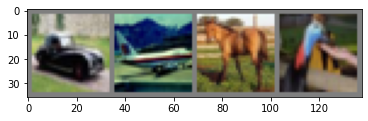

  car plane horse  bird


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def imageshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imageshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))



<b><div class="alert-success"> In the PyTorch Tutorial, The neural network had only taken 3-channels. I added a bunch of layers like MAXPOOL and BATCHNORM into the program. Although Linear and Convolution Layers were already present in the PyTorch Tutorial, It had only 3-in and 3-out channels . I added 12-out channels to the convolution layer to increase the accuracy.</div>

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=5, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(12)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=12, kernel_size=5, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(12)
        self.pool = nn.MaxPool2d(2,2)
        self.conv4 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=5, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(24)
        self.conv5 = nn.Conv2d(in_channels=24, out_channels=24, kernel_size=5, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(24)
        self.fc1 = nn.Linear(24*10*10, 10)

    def forward(self, input):
        output = F.relu(self.bn1(self.conv1(input)))      
        output = F.relu(self.bn2(self.conv2(output)))     
        output = self.pool(output)                        
        output = F.relu(self.bn4(self.conv4(output)))     
        output = F.relu(self.bn5(self.conv5(output)))     
        output = output.view(-1, 24*10*10)
        output = self.fc1(output)

        return output


model = Network()

<b><div class="alert-warning">Adam optimizer involves a combination of two gradient descent methodologies. It is used to accelerate the gradient descent algorithm by taking into consideration the 'exponentially weighted average' of the gradients. Using averages makes the algorithm converge towards the minima in a faster pace. The Adam optimizer had the best accuracy of 99.2% in enhancing the CNN ability in classification and segmentation.</div>

In [ ]:
from torch.optim import Adam
 
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)

<b><div class="alert-success">Imported Variable from torch.autograd to save the image models.</div>

In [ ]:
from torch.autograd import Variable

def saveModel():
    path = "./myFirstModel.pth"
    torch.save(model.state_dict(), path)

<b><div class="alert-success"> Increased the training iteration from 2 which was in the PyTorch Tutorial to 5 iterations. In the PyTorch Tutorial, Mini-batches would print 1,000 times while I changed it to 2,000 times. Added an IF condition for devices with lower end GPU to use CPU. More number of inputs were fed to the Neural Network which helped increasing the accuracy and optimizing the model.</div>

In [ ]:
from torch.autograd import Variable

def train(num_epochs):    
    best_accuracy = 0.0
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # print("The model will be running on", device, "device")
    model.to(device)
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        running_acc = 0.0
        for i, (images, labels) in enumerate(train_loader, 0):         
            images = Variable(images.to(device))
            labels = Variable(labels.to(device))
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() 
            if i % 1000 == 999:    
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 1000))
                running_loss = 0.0
        accuracy = testAccuracy()
        # print('For epoch', epoch+1,'the test accuracy over the whole test set is %d %%' % (accuracy))       
        if accuracy > best_accuracy:
            saveModel()
            best_accuracy = accuracy

train(5)
print('Finished Training')

[1,  1000] loss: 2.111
[1,  2000] loss: 1.793
[1,  3000] loss: 1.697
[1,  4000] loss: 1.588
[1,  5000] loss: 1.530
[1,  6000] loss: 1.465
[1,  7000] loss: 1.380
[1,  8000] loss: 1.365
[1,  9000] loss: 1.330
[1, 10000] loss: 1.279
[1, 11000] loss: 1.251
[1, 12000] loss: 1.229
[2,  1000] loss: 1.129
[2,  2000] loss: 1.096
[2,  3000] loss: 1.065
[2,  4000] loss: 1.065
[2,  5000] loss: 1.041
[2,  6000] loss: 1.046
[2,  7000] loss: 1.046
[2,  8000] loss: 1.026
[2,  9000] loss: 1.020
[2, 10000] loss: 0.982
[2, 11000] loss: 1.009
[2, 12000] loss: 1.004
[3,  1000] loss: 0.919
[3,  2000] loss: 0.874
[3,  3000] loss: 0.903
[3,  4000] loss: 0.927
[3,  5000] loss: 0.897
[3,  6000] loss: 0.926
[3,  7000] loss: 0.868
[3,  8000] loss: 0.872
[3,  9000] loss: 0.902
[3, 10000] loss: 0.915
[3, 11000] loss: 0.918
[3, 12000] loss: 0.890
[4,  1000] loss: 0.790
[4,  2000] loss: 0.784
[4,  3000] loss: 0.823
[4,  4000] loss: 0.844
[4,  5000] loss: 0.863
[4,  6000] loss: 0.812
[4,  7000] loss: 0.845
[4,  8000] 

<b><div class="alert-success">Due to the increase in number of training inputs in the network, The accuracy was increased from 55% which was in the PyTorch Tutorial to 71%. </div>

In [ ]:
from torch.autograd import Variable

def testAccuracy():  
    model.eval()
    accuracy = 0.0
    total = 0.0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
  
            outputs = model(images)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            accuracy += (predicted == labels).sum().item()
    accuracy = (100 * accuracy / total)
    return(accuracy)


final_Accuracy = testAccuracy()

print('Accuracy of the network on the 10000 test images:  %d %%'% (final_Accuracy))

Accuracy of the network on the 10000 test images:  71 %


<b><div class="alert-success"> We compare the Real Labels with the now increased accuracy achieved to check how close the Predicted value is to the Real value.</div>

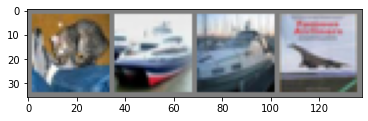

Real labels:    cat  ship  ship plane
Predicted:    cat plane   cat plane


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def testBatch():  
    images, labels = next(iter(test_loader)) 
    imageshow(torchvision.utils.make_grid(images))
    print('Real labels: ', ' '.join('%5s' % classes[labels[j]] 
                               for j in range(batch_size)))
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] 
                              for j in range(batch_size)))
    

model = Network()
path = "myFirstModel.pth"
model.load_state_dict(torch.load(path))

testBatch()

 <b><div class="alert-success"> Check the Accuracy of other classes that performed well, and the classes that did not. As we can see, Truck, Horse and Plane performed the best whereas Frog and Bird performed the least.</div>

In [ ]:
accuracy_arr = []

def testClassess():
    class_correct = list(0. for i in range(number_of_labels))
    class_total = list(0. for i in range(number_of_labels))
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(batch_size):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    for i in range(number_of_labels):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))
        accuracy_arr.append(100 * class_correct[i] / class_total[i])

testClassess()



Accuracy of plane : 72 %
Accuracy of   car : 61 %
Accuracy of  bird : 35 %
Accuracy of   cat : 62 %
Accuracy of  deer : 52 %
Accuracy of   dog : 53 %
Accuracy of  frog : 27 %
Accuracy of horse : 72 %
Accuracy of  ship : 41 %
Accuracy of truck : 78 %


<b><div class="alert-success"> A Bar-Chart is plotted below to show the performance of the classes.</div>

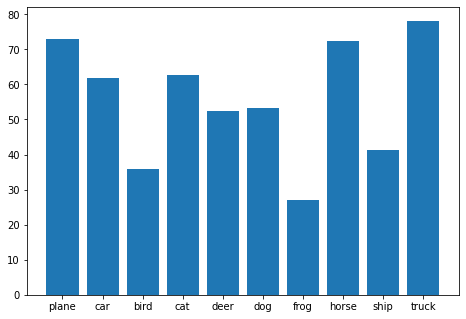

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(classes,accuracy_arr)
plt.show()

### In the above model, I achieved upto 71% Accuracy. I believe if we increase the number of training dataset iterations & train the model more, the Accuracy could be increased uptil 80%. Unfortunately, Due to the time & hardware constraints, it was not possible in this assignment.